# Load the relabeled calsses, pcs and v_exp of the climo data

In [1]:
import xarray as xr
import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# load pcs_climo.pkl
import pickle
with open(data_dir + '/pcs_climo.pkl', 'rb') as f:
    PCs= pickle.load(f)

# # load exp_v_climo.pkl
# with open(data_dir + '/exp_v_climo.pkl', 'rb') as f:
#     variance_explained = pickle.load(f)

# load eofs_climo.pkl
with open(data_dir + '/eofs_climo.pkl', 'rb') as f:
    EOFs = pickle.load(f)

# explained variance, from the ensemble data
import pickle
exp_v = pickle.load(open('ens_ana_data/exp_v.p', 'rb'))

# # load the AIC of the mean data
# import pickle
# with open('data_fig1/aic_values_dict.pkl', 'rb') as f:
#     aic_values_dict_mean = pickle.load(f)


# Load the data generated from the ensemble data

In [2]:
# read the aic_values_dict
import pickle
with open('ens_ana_data/aic_values_dict.pkl', 'rb') as f:
    aic_values_dict = pickle.load(f)

n_iterations = 500
n_components_range = range(2, 9)  # 2 to 8 inclusive

# Compute ΔAIC for each n_components during each Monte Carlo iteration
delta_aics_all_iterations = []
for i in range(n_iterations):
    iteration_delta_aics = np.diff([aic_values_dict[n][i] for n in n_components_range])
    delta_aics_all_iterations.append(iteration_delta_aics)



# Load the ens pcs from path /ens_ana_data/
import pickle
pcs_ens = pickle.load(open('ens_ana_data/pcs.p', 'rb'))

# correct the sign of the ens pcs
from scipy import stats
for i in range(len(pcs_ens)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(pcs_ens[i][:,1], PCs[:,1])
    
    if slope<0:
        pcs_ens[i][:,1]=pcs_ens[i][:,1]*-1



In [3]:
pc1_ens=np.zeros((len(pcs_ens[0][:,0]),len(pcs_ens)))
pc2_ens=np.zeros((len(pcs_ens[0][:,0]),len(pcs_ens)))

for i in range(len(pcs_ens)):
    pc1_ens[:,i]=pcs_ens[i][:,0]
    pc2_ens[:,i]=pcs_ens[i][:,1]

pc1_ens_5th=np.percentile(pc1_ens,5,axis=1)
pc1_ens_25th=np.percentile(pc1_ens,25,axis=1)
pc1_ens_75th=np.percentile(pc1_ens,75,axis=1)
pc1_ens_95th=np.percentile(pc1_ens,95,axis=1)
pc1_ens_median=np.median(pc1_ens,axis=1)

pc2_ens_5th=np.percentile(pc2_ens,5,axis=1)
pc2_ens_25th=np.percentile(pc2_ens,25,axis=1)
pc2_ens_75th=np.percentile(pc2_ens,75,axis=1)
pc2_ens_95th=np.percentile(pc2_ens,95,axis=1)
pc2_ens_median=np.median(pc2_ens,axis=1)

In [4]:
# read the label_check
import pickle
with open('ens_ana_data/label_check_with_prob.pkl', 'rb') as f:
    label_check = pickle.load(f)

label_check.shape

(13824,)

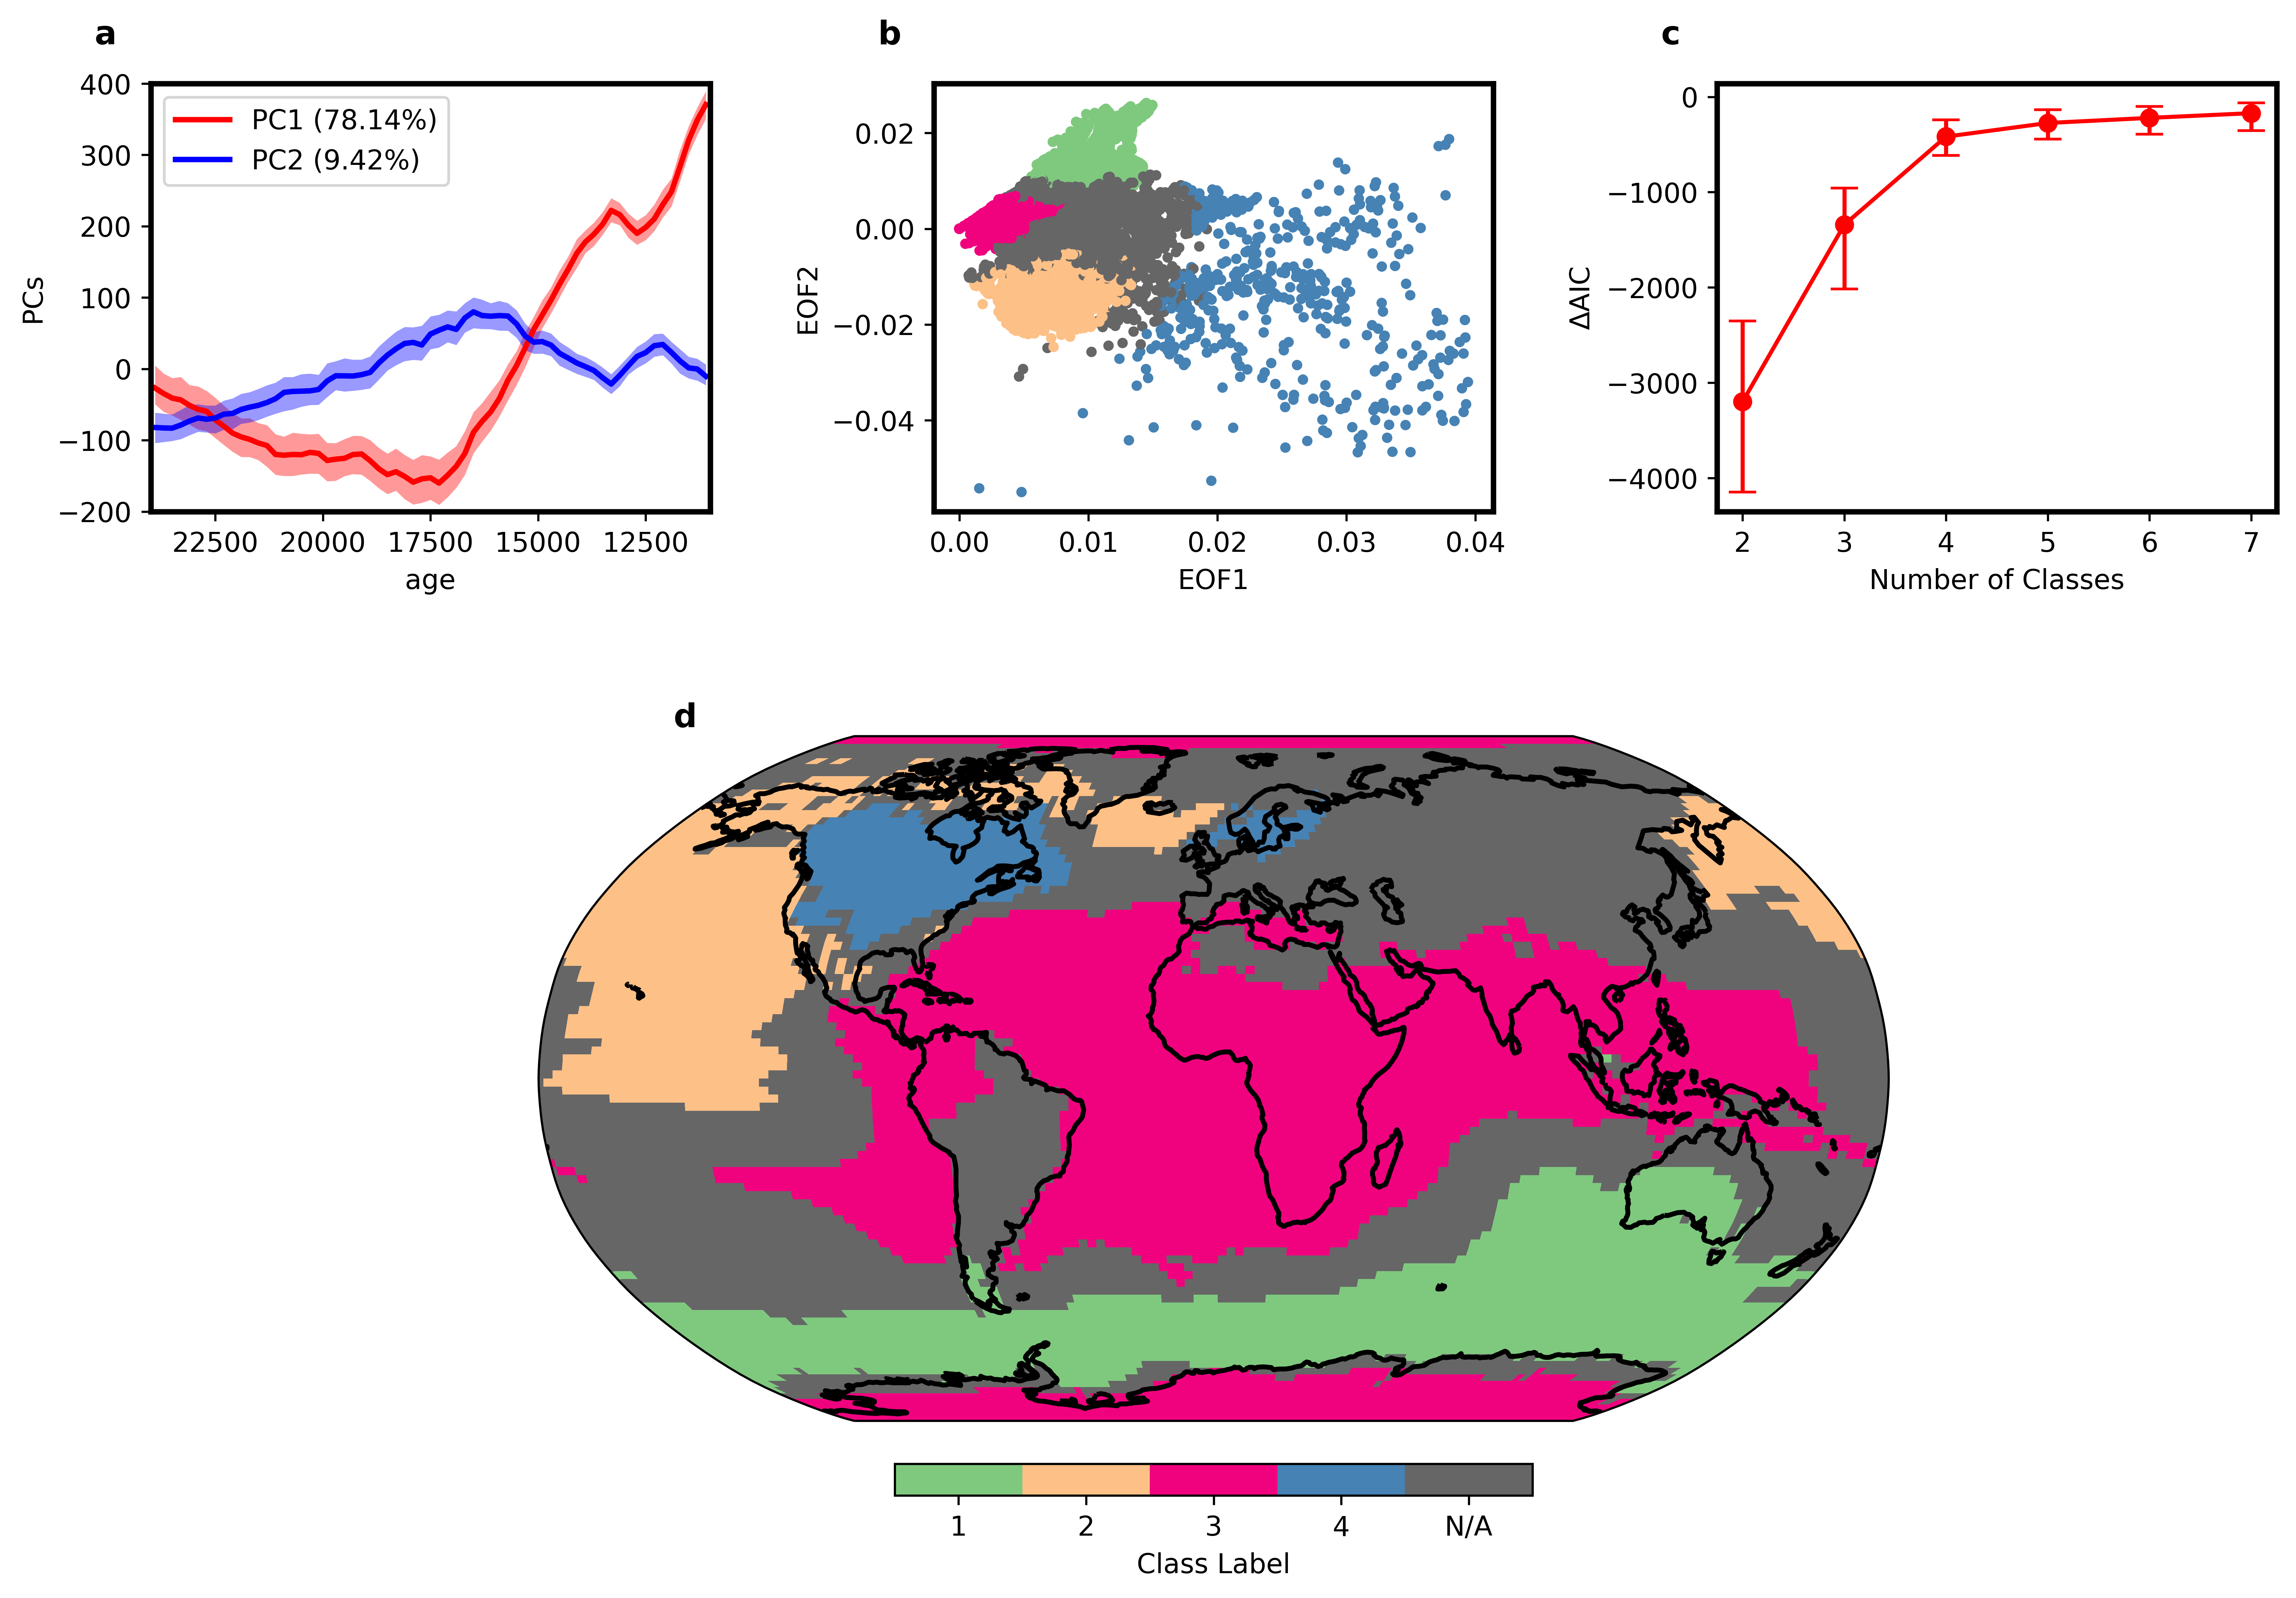

In [10]:

# plot the PCs against the age
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
from scipy.stats import zscore
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages




fig = plt.figure(figsize=(14, 10),dpi=600)
spec = fig.add_gridspec(nrows=2, ncols=3, height_ratios=[1, 2],wspace=0.4)

# Create your subplots
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, :], projection=ccrs.Robinson())  # Spans all columns of the second row



    
# ax1.fill_between(ds_sat['age'], pc1_ens_5th, pc1_ens_95th, color='r', alpha=.15,linewidth=0)
# fill the area between the 25th and 75th quantile of the pc1 using red with alpha=0.4
ax1.fill_between(ds_sat['age'], pc1_ens_25th, pc1_ens_75th, color='r', alpha=.4,linewidth=0)

# fill the area between the 5th and 95th quantile of the pc2 using blue with alpha=0.15
# ax1.fill_between(ds_sat['age'], pc2_ens_5th, pc2_ens_95th, color='b', alpha=.15,linewidth=0)
# fill the area between the 25th and 75th quantile of the pc2 using blue with alpha=0.4
ax1.fill_between(ds_sat['age'], pc2_ens_25th, pc2_ens_75th, color='b', alpha=.4,linewidth=0)

x = np.array([exp_v[i][0] for i in exp_v]) 
y = np.array([exp_v[i][1] for i in exp_v]) 
mean_x = np.mean(x)*100
mean_y = np.mean(y)*100
# only preserve 2 decimal places for the mean_x and mean_y
mean_x = round(mean_x,2)
mean_y = round(mean_y,2)

ax1.plot(ds_sat['age'], (pc1_ens_median), color='r',linewidth=2,markerfacecolor='white', label=f'PC1 ({mean_x}%)')
ax1.plot(ds_sat['age'], (pc2_ens_median), color='b',linewidth=2,markerfacecolor='white', label=f'PC2 ({mean_y}%)')

# set line width of the box
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)
# set xlim
ax1.set_xlim(11000, 24000)
# set ylim
ax1.set_ylim(-200, 400)

# reverse the x-axis
ax1.invert_xaxis()

ax1.set_xlabel('age')
ax1.set_ylabel('PCs')
ax1.legend()
# ax1.grid(True)







# colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# cmap = mcolors.ListedColormap(colors[0:len(np.unique(ds_sat['class_relabeled']))])
unique_labels = np.unique(ds_sat['class_relabeled'])
# cmap = plt.get_cmap('Accent', len(unique_labels))
custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    (0.4, 0.4, 0.4)
]

# Create a ListedColormap object with your custom colors
cmap = ListedColormap(custom_colors)

# scatter = ax2.scatter(EOFs[:,0], EOFs[:,1], c=ds_sat['class_relabeled'], cmap=cmap,s=8)
labels_flat = label_check.flatten()
scatter = ax2.scatter(EOFs[:,0]*-1, EOFs[:,1], c=labels_flat, cmap=cmap,s=8)
# axes[1, 0].set_title("EOF1 vs EOF2")
ax2.set_xlabel("EOF1")
ax2.set_ylabel("EOF2")
# set line width of the box
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
    



n_components_range = range(2, 9)  # 2 to 8 inclusive
# # Compute means, lower and upper limits
# median = [np.median(aic_values_dict[key]) for key in n_components_range]
# lower_limits = [np.percentile(aic_values_dict[key], 5) for key in n_components_range]
# upper_limits = [np.percentile(aic_values_dict[key], 95) for key in n_components_range]

# # Differences from the mean for error bars
# lower_errors = [mean - lower for mean, lower in zip(median, lower_limits)]
# upper_errors = [upper - mean for mean, upper in zip(median, upper_limits)]

# AIC Plot
# ax2.errorbar(n_components_range, means, yerr=[lower_errors, upper_errors], 
#                capsize=5, fmt='-o', label='Mean AIC with 5% and 95% quantiles of AIC')
# # AIC Plot
# line, caplines, barlinecols = ax3.errorbar(n_components_range, median, 
#                yerr=[lower_errors, upper_errors], capsize=3, color='black',
#                fmt='-o', markerfacecolor='none', markersize=7,markeredgewidth=1.5, label='Mean AIC with 5% and 95% quantiles of AIC')  # add markerfacecolor='none'
# Now, compute the mean ΔAIC and its 5% and 95% quantiles
delta_aics_median = np.median(delta_aics_all_iterations, axis=0)
delta_aics_lowers = np.percentile(delta_aics_all_iterations, 25, axis=0)
delta_aics_uppers = np.percentile(delta_aics_all_iterations, 75, axis=0)

# Differences from the mean ΔAIC for error bars
delta_lower_errors = delta_aics_median - delta_aics_lowers
delta_upper_errors = delta_aics_uppers - delta_aics_median

ax3.errorbar(n_components_range[:-1], delta_aics_median, yerr=[delta_lower_errors, delta_upper_errors], 
               capsize=5, fmt='-o', color='red', label='ΔAIC')
ax3.set_xlabel('Number of Classes')
ax3.set_ylabel('ΔAIC')
# # ax2.legend()
# ax3.grid(True)
# set line width of the box
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

# show vertical grid lines
# ax3.grid(axis='x', linestyle='--', linewidth=1.5)

# # ΔAIC Plot
# ax3_2 = ax3.twinx()
# ax3_2.errorbar(n_components_range[:-1], delta_aics_means, yerr=[delta_lower_errors, delta_upper_errors], 
#                capsize=5, fmt='-o', color='red', label='ΔAIC')
# # ax3_2.set_xlabel('Number of Classes')
# # set ylim
# ax3_2.set_ylim(-6000, 500)
# # set xlim
# ax3_2.set_xlim(1.5, 8.5)
# ax3_2.errorbar(n_components_range, median, 
#                yerr=[lower_errors, upper_errors], capsize=3, color='black',
#                fmt='-o', markerfacecolor='none', markersize=7,markeredgewidth=1.5, label='AIC')  # add markerfacecolor='none'

# ax3_2.set_ylabel('ΔAIC')
# ax3_2.legend(loc=[0.6,0.59])
# # ax[1].grid(True)




# sat_label = ds_sat['class_relabeled']

custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),
    (0.4, 0.4, 0.4)
]

# Create a ListedColormap object with your custom colors
cmap = ListedColormap(custom_colors)


ax4.add_feature(cfeature.COASTLINE, linewidth=1.8, edgecolor='black')
# ax4.gridlines()
# ax4.add_feature(cfeature.BORDERS, linewidth=1.5, edgecolor='black')


# Generating meshgrid for lon-lat with one additional point in each dimension
lon, lat = np.meshgrid(np.linspace(ds_sat.lon.min(), ds_sat.lon.max(), len(ds_sat.lon)), 
                       np.linspace(ds_sat.lat.min(), ds_sat.lat.max(), len(ds_sat.lat)))

# Reshape label_check to match the dimensions of the ds_sat data
label_check_reshaped = label_check.reshape(len(ds_sat.lat), len(ds_sat.lon))

# Using pcolormesh
map_plot = ax4.pcolormesh(lon, lat, label_check_reshaped, cmap=cmap, transform=ccrs.PlateCarree())

# gl = ax4.gridlines(draw_labels=True)

ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')

bounds = np.arange(len(np.unique(labels_flat))+1) - 0.5
ticks = np.arange(len(np.unique(labels_flat)))
# cbar = fig.colorbar(sc, ax=ax4, orientation='horizontal', pad=0.05, boundaries=bounds, ticks=ticks, shrink=0.5)
# cbar.ax.set_xlabel('Class Label')
cbar = fig.colorbar(map_plot, ax=ax4, orientation='horizontal', pad=0.05, boundaries=bounds, ticks=ticks, shrink=0.3)
# set the colorbar labels
cbar.ax.set_xticklabels(['1', '2', '3', '4', 'N/A'])
cbar.ax.set_xlabel('Class Label')

# add panel labels
ax1.text(-0.1, 1.15, 'a', transform=ax1.transAxes, fontsize=12,fontweight='bold', va='top')
ax2.text(-0.1, 1.15, 'b', transform=ax2.transAxes, fontsize=12,fontweight='bold', va='top')
ax3.text(-0.1, 1.15, 'c', transform=ax3.transAxes, fontsize=12, fontweight='bold', va='top')
ax4.text(0.1, 1.05, 'd', transform=ax4.transAxes, fontsize=12, fontweight='bold', va='top')



# adjust vertical space between subplots
plt.subplots_adjust(hspace=0.35)


fig.savefig('outputs/figure1.pdf', format='pdf', dpi=600, bbox_inches='tight')

# map_plot.set_rasterized(False)
# with PdfPages('outputs/figure1.pdf') as pdf:
#     pdf.savefig(fig, bbox_inches='tight')

plt.show()